Loaded weights shape: (4, 2)


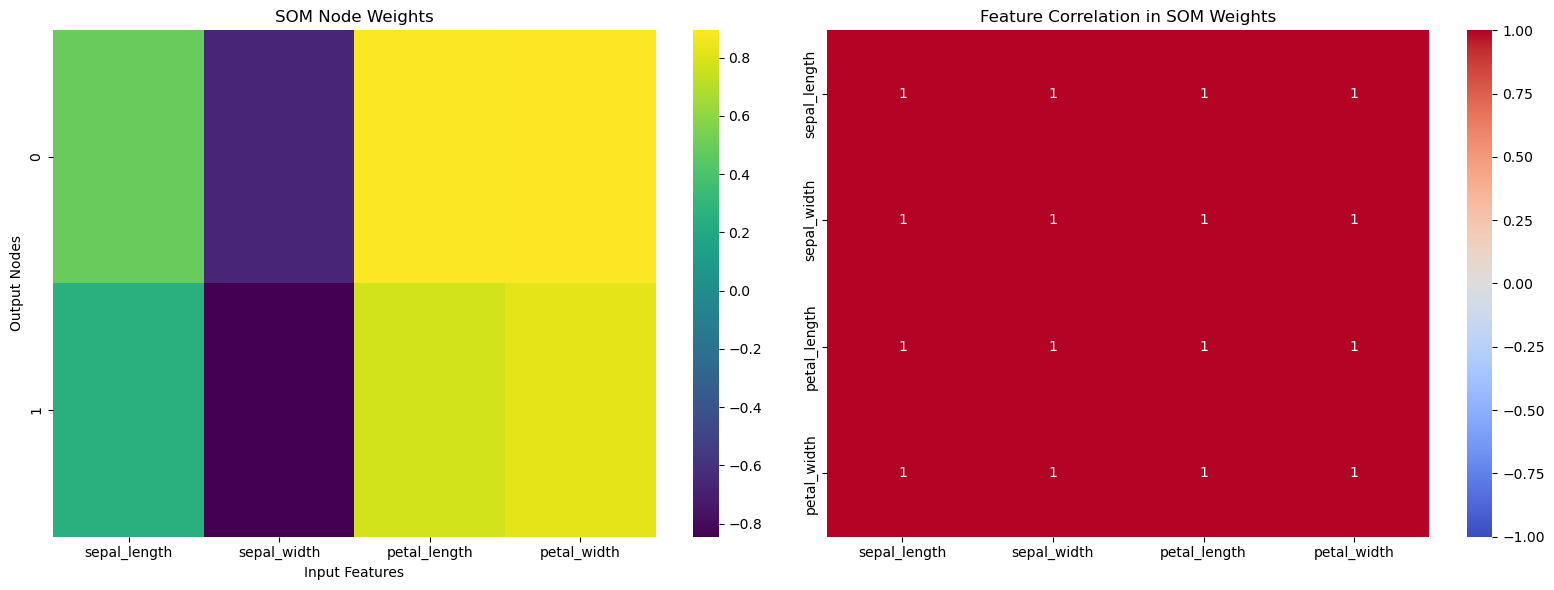

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def load_weights(filename):
    weights = np.genfromtxt(filename, delimiter=',')
    print(f"Loaded weights shape: {weights.shape}")  # Debug output
    return weights

def plot_heatmap(weights_file, data_file):
    # Load weights and data
    weights = load_weights(weights_file)
    iris = pd.read_csv(data_file)
    
    # Get feature names from data (exclude last column if it's non-numeric)
    numeric_cols = iris.select_dtypes(include=[np.number]).columns
    feature_names = numeric_cols.tolist()
    
    # Verify dimensions
    input_features = weights.shape[0]
    if len(feature_names) != input_features:
        raise ValueError(
            f"Feature count mismatch: "
            f"Weights have {input_features} features, "
            f"Dataset has {len(feature_names)} numeric columns"
        )
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Weight matrix heatmap
    sns.heatmap(weights.T, ax=ax1, cmap='viridis',
                yticklabels=range(weights.shape[1]),
                xticklabels=feature_names)
    ax1.set_title("SOM Node Weights")
    ax1.set_xlabel("Input Features")
    ax1.set_ylabel("Output Nodes")
    
    # 2. Feature correlation
    weights_df = pd.DataFrame(weights.T, columns=feature_names)
    sns.heatmap(weights_df.corr(), ax=ax2, annot=True, 
                cmap='coolwarm', vmin=-1, vmax=1)
    ax2.set_title("Feature Correlation in SOM Weights")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_heatmap("som_weights.csv", "iris_train.csv")
